# META DATA REVIEW

TheMovieDB.org
  - data
    - tmdb.movies.csv.gz
  - documentation
    - all data comes from https://developers.themoviedb.org/3/discover/movie-discover
    - Again, only 2010-2018 movies have been included.
  - data
    - tn.movie_budgets.csv.gz
  - documentation
    - This comes straight from [The-Numbers.com](https://www.the-numbers.com/movie/budgets/all)
    - this includes all data from The Numbers! it is not subset to 2010-2018

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## About the Data
The dataset is a collection of information on around movies. 
For each movie, the dataset includes information movies genre, movie title, popularity, release data, title, vote_average, vote count

In [40]:
tmdb_movies = pd.read_csv('./data/tmdb.movies.csv.gz')

In [41]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

## Data Feature



### Missing Values

In [43]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


the data has no missing values


In [58]:
print((tmdb_movies[['Unnamed: 0','genre_ids','id','original_language','original_title','popularity',
                    'release_date', 'title','vote_average', 'vote_count']]==0).sum())


Unnamed: 0             1
genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average         136
vote_count             0
dtype: int64


vote_average column has 136 0 values

##### counting missing values in vote average


In [62]:
#to determine if any of the data in vote_average col is missing
tmdb_movies.vote_average.isnull().values.any()

False

In [63]:
#if yes, how many are mising
tmdb_movies.vote_average.isnull().sum()

0

there are no missing values in the Vote Average Col


In [60]:
tmdb_movies.vote_average.notnull().sum

<bound method Series.sum of 0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
26487    True
26488    True
26489    True
26490    True
26491    True
26492    True
26493    True
26494    True
26495    True
26496    True
26497    True
26498    True
26499    True
26500    True
26501    True
26502    True
26503    True
26504    True
26505    True
26506    True
26507    True
26508    True
26509    True
26510    True
26511    True
26512    True
26513    True
26514    True
26515    True
26516    True
Name: vote_average, Length: 26517, dtype: bool>

In [59]:
tmdb_movies.vote_average.isnull().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
26487    False
26488    False
26489    False
26490    False
26491    False
26492    False
26493    False
26494    False
26495    False
26496    False
26497    False
26498    False
26499    False
26500    False
26501    False
26502    False
26503    False
26504    False
26505    False
26506    False
26507    False
26508    False
26509    False
26510    False
26511    False
26512    False
26513    False
26514    False
26515    False
26516    False
Name: vote_average, Length: 26517, dtype: bool>

## Duplicates

In [44]:
tmdb_duplicates= tmdb_movies[tmdb_movies.duplicated()]

In [45]:
print(len(tmdb_duplicates))

0


data has no duplicates

## Checking for extraneous values

In [46]:
for col in tmdb_movies.columns:
    print(col, '\n', tmdb_movies[col].value_counts(normalize=True).head(), '\n\n')

Unnamed: 0 
 2047     0.000038
5448     0.000038
3371     0.000038
13612    0.000038
15661    0.000038
Name: Unnamed: 0, dtype: float64 


genre_ids 
 [99]    0.139533
[]      0.093487
[18]    0.085530
[35]    0.062601
[27]    0.043180
Name: genre_ids, dtype: float64 


id 
 292086    0.000113
463839    0.000113
11976     0.000113
391872    0.000113
416572    0.000113
Name: id, dtype: float64 


original_language 
 en    0.878342
fr    0.019120
es    0.017159
ru    0.011238
ja    0.009994
Name: original_language, dtype: float64 


original_title 
 Eden             0.000264
Home             0.000226
Truth or Dare    0.000189
Lucky            0.000189
Aftermath        0.000189
Name: original_title, dtype: float64 


popularity 
 0.600    0.265377
1.400    0.024475
0.840    0.022137
0.624    0.003922
0.625    0.003469
Name: popularity, dtype: float64 


release_date 
 2010-01-01    0.010144
2011-01-01    0.007542
2014-01-01    0.005845
2012-01-01    0.005845
2013-01-01    0.005468
Name: r

the data do not show any extreneous values

## Quantitative View of Data

In [76]:
tmdb_movies.describe().T # decribe the data 


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26517.0,13258.000000,7654.942880,0.0,6629.0,13258.000,19887.000,26516.000
id,26517.0,295050.153260,153661.615648,27.0,157851.0,309581.000,419542.000,608444.000
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


In [77]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


all the values in the quantitative review section makes sense

## Columns Required for Analysis

In [48]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [49]:
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [82]:
tmdb_movies.info() # since release data is object we need to make it datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [83]:
tmdb_movies['release_date']= pd.to_datetime(tmdb_movies['release_date']) 

In [89]:
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Data Visualization

##### Scatter Plot

In [85]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<IPython.core.display.Javascript object>


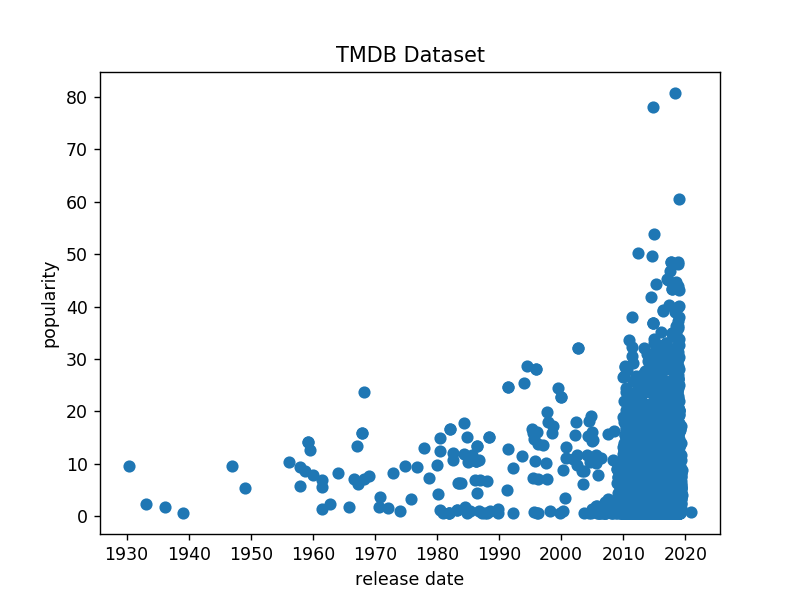

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'popularity')

In [86]:
fig, ax = plt.subplots()

# scatter the releaese date against the popularity
ax.scatter(tmdb_movies['release_date'], tmdb_movies['popularity'])
# set a title and labels
ax.set_title('TMDB Dataset')
ax.set_xlabel('release date')
ax.set_ylabel('popularity')

In [ ]:
plt.scatter()